<a href="https://colab.research.google.com/github/finardi/tutos/blob/master/BERT_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='purple'>Esse texto é baseado nos seguintes blogs / artigos </font>
1. <font color='red'>Artigo BERT:</font> https://arxiv.org/abs/1810.04805
2. <font color='red'>Google’s Neural Machine Translation System:</font> https://arxiv.org/pdf/1609.08144.pdf
3. <font color='red'>Blog $-$ MLExplained:</font> http://mlexplained.com/2019/01/07/paper-dissected-bert-pre-training-of-deep-bidirectional-transformers-for-language-understanding-explained/
4. <font color='red'>Blog $-$ Chris McCormick and Nick Ryan:</font> https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/

# <font color='purple'> **BERT** - principais ideias </font>

**TL;DR**
- #### A Language Model (LM) é um método de treinamento eficaz para o uso de dados não rotulados para pré-treinar redes neurais de NLP
- #### Modelos de LM tradicionais usam os $n$ tokens anteriores para fazer a previsão do pŕoximo. Em contraste, o BERT usa Masked Language Model (MLM) que leva em consideração os tokens anteriores e próximos <font color='purple'> __ao mesmo tempo__</font> para fazer uma predição, que leva a uma predição com contexto.
- #### O BERT também é treinado em uma tarefa de previsão de próxima sentença para lidar melhor com tarefas que exigem raciocínio sobre o relacionamento entre duas frases (task de pergunta e resposta)
- #### O BERT usa a arquitetura Transformer para codificar sentenças.
- #### O BERT tem melhor desempenho quando recebe mais parâmetros, mesmo em conjuntos de dados pequenos.

## <font color='purple'> Transfer Learning em NLP </font>
#### Antes do ELMo e BERT, o pré-treinamento em NLP era limitado ao word-embeddings como _word2vec_ e _GloVe_. A ideia principal desses métodos é mapear cada palavra para um vetor que representa alguns aspectos de seu significado (por exemplo, o vetor para __King__ inclui informações sobre status, sexo etc., e esse método funciona bem, porém ainda existe o problema de contexto, por exemplo a palavra  <font color='red'> banco </font> pode ter muitos significados, mas em _word2vec_ ela sempre será representada com o mesmo vetor de embeddings. 


## Ideia básica de treinamento do BERT $-$ Masked Language Model (MLM):

- #### <font color='orange'> **Predizer a palavra mascarada:** </font>

#### Sem cerimônias, dado uma sentença e seu contexto, a MLM prediz a probabilidade de uma palavra ocorrer dentro desse contexto, exemplo:

> #### <font color='green'> _Gostaria de aumentar meu $[MASK]$_ do cartão. </font>

#### Em geral as LM tradicionais treinam sentenças da "esquerda para a direita". Elas recebem uma sequência de palavras e precisam prever a próxima palavra, exemplo:
> #### <font color='green'> Gostaria de aumentar meu ___ .</font> 

#### A LM tradicional tenta prever a palavra  em <font color='green'> ___</font>. Essa abordagem é eficaz quando realmente queremos gerar sentenças. Podemos prever a próxima palavra, anexá-la à sequência atual e prever a próxima...

#### No entanto, não há necessidade do treinamento possuir a regra "da esquerda para a direita" quando _não_ estamos interessados ​​em gerar sentenças. Essa é uma das principais características do BERT: _em vez de prever a próxima palavra após uma sequência de palavras, o BERT oculta (mask) aleatoriamente as palavras na sentença e as prevê._

---

### <font color='gray'> **Por que esse método é eficaz?** </font>
> #### Esse método força o modelo a aprender o contexto da sentença para deduzir quais palavras estão faltando.

#### Quando comparamos o <font color='blue'>B</font>ERT com LSTM <font color='blue'>B</font>idirecionais, notamos que as LSTMs treinam a sentença "da esquerda para a direita" e também "da direita para a esquerda". A diferença crucial entre o treinamento do BERT e da LSTM é que o BERT utiliza informações de toda a sentença de forma simultânea $-$ independentemente da posição.

####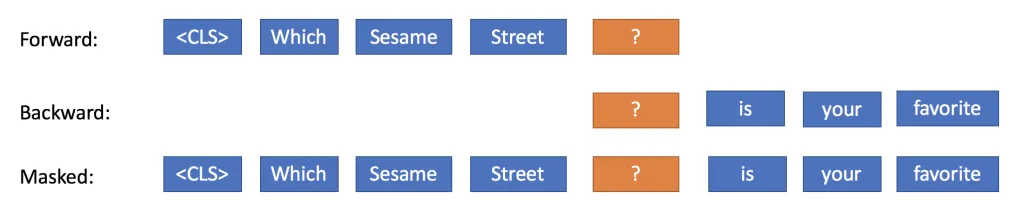

## <font color='purple'> WordPiece e tokenização </font>
#### Um detalhe importante é que o BERT usa wordpiece, dessa forma a palavra **playing** se torna **play** + ##**ing**. A wordpiece é eficaz na redução do tamanho do vocabulário e aumenta a quantidade de dados disponíveis para cada palavra

#### Para tokenizar uma palavra com o método wordpiece, primeiro verifica se a palavra inteira está no vocabulário. Caso contrário, o tokenizador tenta dividir a palavra nas maiores subpalavras possíveis contidas no vocabulário e, como último recurso, decompõe a palavra em caracteres individuais. Observe que, por isso, sempre podemos representar uma palavra como, no mínimo, a coleção de seus caracteres individuais.

#### Como resultado, em vez de atribuir palavras do vocabulário a um token genérico como $[UNK]$, as palavras que não estão no vocabulário são decompostas em subpalavras e tokens de caracteres para os quais podemos gerar embeddings.

#### Por exemplo, o tokenizador pode dividir a palavra <font color='green'>$embeddings$</font> nos seguintes tokens: [<font color='green'>'$em$'</font>, <font color='green'>'##$bed$'</font>, <font color='green'>'##$ding$'</font>, <font color='green'>'##$s$'</font> ] que reterão parte do significado contextual da palavra original. Podemos até calcular a média desses vetores de embeddings de subpalavras para gerar um vetor aproximado para a palavra original.

## <font color='purple'> Modelo </font>

#### <font color='red'>**1**.</font> Token especial, $[SEP]$
> Que marca o final de uma frase ou a separação entre duas frases
#### <font color='red'>**2**.</font> Token especial, $[CLS]$
> Usado no início do texto. É uma representação agregada para tarefas de classificação e está sempre presente em todas as tarefas do BERT.
#### <font color='red'>**3**.</font> Tokens do texto $-$ os IDs do tokenizer
#### <font color='red'>**4**.</font> IDs de máscara 
> que indicam quais elementos na sequência são tokens e quais são elementos de padding.
#### <font color='red'>**5**.</font> IDs de segmento
> Usado para distinguir frases diferentes, o BERT é pré-treinado em pares de sentenças, uma sentença recebe 0's (de mesmo tamanho da sequência) e outra sentença recebe 1's, dessa forma o BERT consegue identificar qual sentença é da pergunta e qual é da resposta.
#### <font color='red'>**6**.</font> Embeddings posicionais 
> Usado para mostrar a posição do token na sequência,  como o transformer não possui uma estrutura de recorrência (igual a LSTM), uma frase que começa e termina com a mesma palavra, poderia ter o mesmo significado sem o uso dos embeddings posicionais, por exemplo: 
 - <font color='brown'>Dados</font> é a matéria prima dos Cientista de <font color='brown'>Dados</font>.

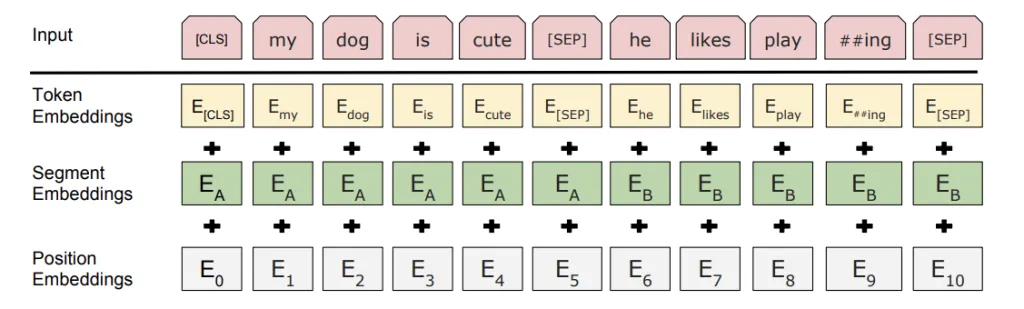

## <font color='purple'> Fine Tunning </font>

#### O BERT é só o encoder, ele produz uma sequência de estados ocultos. Para tarefas de classificação, essa sequência precisa ser reduzida a um único vetor. Existem várias maneiras de converter essa sequência em uma única representação vetorial de uma frase como o max pool ou average pool. No entanto, os autores optaram por um método mais simples: simplesmente pegar o estado oculto correspondente ao primeiro token, ou seja, pegar o token $[CLS]$



#### Os autores do BERT testaram algumas estratégias de fine-tunning para uma BiLSTM na tarefa de NER com a métrica F$_1$

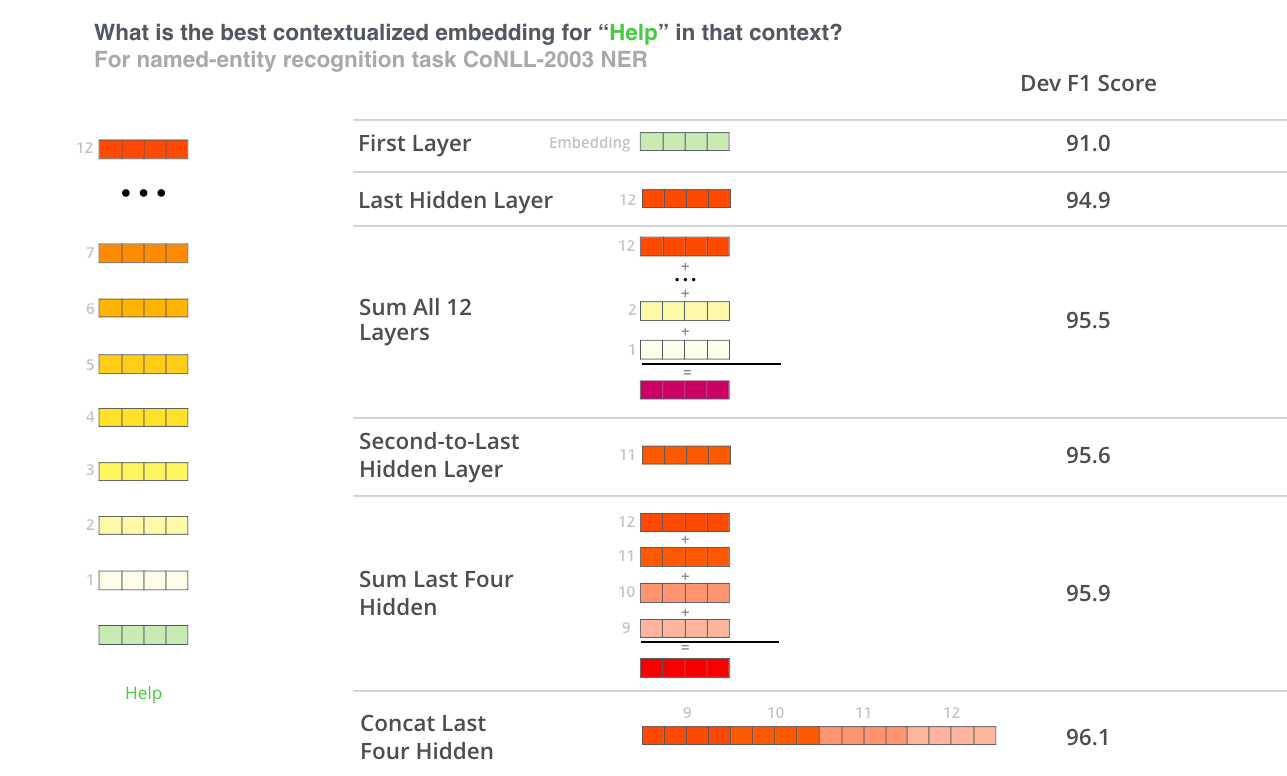


# <font color='purple'> Extraindo Embeddings do **BERT** </font>

> Vamos usar o BERT pré-treinado da _Hugging Face_ com o tokenizador em Português **BERTinbau**

In [ ]:
!pip install -q transformers 

     |████████████████████████████████| 778kB 2.7MB/s 
     |████████████████████████████████| 890kB 12.9MB/s 
     |████████████████████████████████| 1.1MB 17.9MB/s 
     |████████████████████████████████| 3.0MB 24.0MB/s 


In [ ]:
import torch
from transformers import BertTokenizer, BertModel

import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
model_name = 'neuralmind/bert-base-portuguese-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)

In [ ]:
# analisando algumas palavras
list(tokenizer.vocab.keys())[2500:2515]

['conver',
 'Tem',
 'Lei',
 'membro',
 'time',
 'musical',
 '23',
 '##lmente',
 'comum',
 'brasileira',
 'ge',
 'Mais',
 '##tí',
 '##ater',
 'tão']

## <font color='purple'> Amostra de texto </font>
> ### <font color='green'> O <font color='dark orange'>_banco_</font> possui o melhor atendimento digital, podemos acessar o <font color='dark orange'>_banco_</font> até mesmo sentado em um <font color='dark orange'>_banco_</font> da praça.

#### Note que na sentença, a palavra <font color='dark orange'>_banco_</font> possui signicados diferentes.


In [ ]:
text = 'O banco possui o melhor atendimento digital, podemos ' \
       'acessar o banco até mesmo sentado em um banco da praça.'

# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indices.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indices.
for tup in zip(tokenized_text, indexed_tokens):
    print(f'{tup[0] :<12} {tup[1]:>6}')

[CLS]           101
O               231
banco          6465
possui         1776
o               146
melhor         1407
atendimento   11289
digital        4876
,               117
podemos        7105
acess          5352
##ar            159
o               146
banco          6465
até             548
mesmo           653
sentado       21541
em              173
um              222
banco          6465
da              180
praça          6357
.               119
[SEP]           102


##  <font color='purple'> Segment ID</font>

#### O BERT é treinado em pares de frases, usando $1s$ e $0s$ para distinguir as duas frases. Ou seja, para cada token em "tokenized_text", devemos especificar a qual frase pertence: sentença $0$ (uma série de $0s$) ou sentença $1$ (uma série de $1s$). Para nossos propósitos, as entradas de sentença única requerem apenas uma série de $1s$; portanto, criaremos um vetor de $1s$ para cada token em nossa frase de entrada.

#### <font color='red'>Obs.:</font> Se você deseja processar duas frases, atribua cada palavra na primeira frase mais o token $[SEP]$ a 0 e todos os tokens da segunda frase a 1.

In [ ]:
print(len(tokenized_text))

# Mark each of the 24 tokens as belonging to sentence "1".
segments_ids = [1] * len(tokenized_text)

print (segments_ids)

24
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## <font color='purple'> Extracting Embeddings 
#### Em seguida, precisamos converter nossos dados em tensores e chamar o modelo BERT. 




In [ ]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

#### Chamar `from_pretrained` buscará o modelo na Internet. Quando carregamos o `bert-base-portuguese-cased`, vemos a definição do modelo impressa no log. O modelo é uma rede neural profunda com 12 camadas. 

#### `model.eval()` coloca o modelo no modo de avaliação em oposição ao modo de treinamento. Nesse caso, o modo de avaliação desativa a regularização dropout, que é usada no treinamento.

In [ ]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained(model_name,
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(29794, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

#### Em seguida, vamos avaliar o BERT no texto de exemplo e buscar os estados ocultos da rede.

> #### <font color='red'>Nota:</font> `torch.no_grad` diz ao PyTorch para não construir o grafo computacional durante o forward (já que não vamos executar o backprop) - isso apenas reduz o consumo de memória e acelera um pouco as coisas. 

In [ ]:
# Run the text through BERT, and collect all of the hidden states produced from all 12 layers. 
with torch.no_grad():
    outputs = model(tokens_tensor, segments_tensors)

    # Evaluating the model will return a different number of objects based on how it's  
    # configured in the `from_pretrained` call earlier. In this case, becase we set 
    # `output_hidden_states = True`, the third item will be the hidden states from all 
    # layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2] # outputs is a tuple (last_hidden_state, pooler_output, hidden_states, attentions)

## <font color='purple'> Entendendo o Output


#### O conjunto completo de estados ocultos armazenados no objeto `hidden_states`, precisa de um pouco de atenção. Este objeto tem quatro dimensões:

> #### 1. número de layers: $13$ (o 1o layers são os embeddings)
> #### 2. batche size: $1~-$ frase
> #### 3. comprimento da sequência / número de tokens: $24$ em nosso exemplo
> #### 4. número de neurônios da hidden layer: $768$

#### São  $13*24*768=239616$ valores únicos para representar a frase do exemplo.

#### A segunda dimensão, o batch é usada ao enviar várias frases para o modelo de uma só vez (mini-batch); aqui, porém, só temos um exemplo de sentença.


In [ ]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Batch size:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Batch size: 1
Number of tokens: 24
Number of hidden units: 768


#### Vamos dar uma rápida olhada no intervalo de valores para uma determinada camada e token.

#### Você verá que o intervalo é bastante semelhante para todas as camadas e tokens, com a maioria dos valores variando entre $[- 2, 2 ]$ e um pequeno número de valores em torno de $-10$.

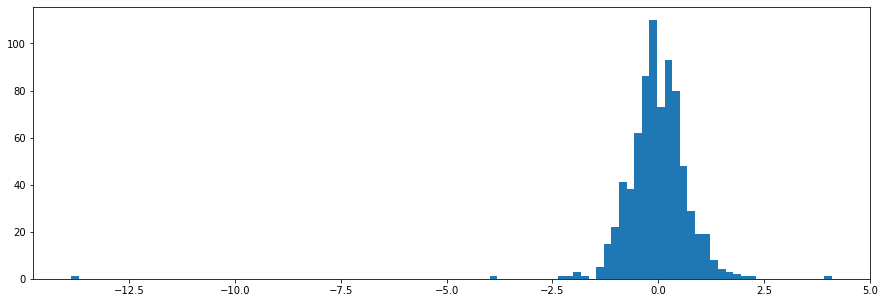

In [ ]:
# For the 6th token in our sentence, select its feature values from layer 6.
token_i = 6
layer_i = 6
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(15,5))
plt.hist(vec, bins=100)
plt.show()

#### Agrupar os valores por layer faz sentido para o modelo, mas, para nossos propósitos, queremos que ele seja agrupado por token.

#### Dimensões atuais:

#### `[# layers, # batches, # tokens, # features]`

#### Dimensões desejadas:

#### `[# tokens, # layers, # features]`

In [ ]:
# `hidden_states` is a tuple.
print('      Type of hidden_states: ', type(hidden_states))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', hidden_states[0].size())

      Type of hidden_states:  <class 'tuple'>
Tensor shape for each layer:  torch.Size([1, 24, 768])


#### Vamos combinar as camadas para criar todo esse grande tensor.

In [ ]:
# Concatenate the tensors for all layers. We use `stack` here to create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)
token_embeddings.size()

torch.Size([13, 1, 24, 768])

In [ ]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([13, 24, 768])

#### Finalmente, podemos alternar as dimensões "camadas" e "tokens" com `permute`.

In [ ]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([24, 13, 768])

## <font color='purple'> Word and sentence vectors from hidden states </font>

#### Agora, o que fazemos com esses hidden_states? Gostaríamos de obter vetores individuais para cada um de nossos tokens, ou talvez uma única representação vetorial de toda a sentença, mas para cada token de nossa entrada, temos $13$ vetores separados, cada um com tamanho $768$.

####  Para obter os vetores individuais, precisamos combinar esses vetores, mas qual camada ou combinação de camadas fornece a melhor representação? Infelizmente, não existe uma resposta fácil... Vamos tentar algumas abordagens.

### <font color='purple'>Word Vectors</font>

#### Para dar alguns exemplos, vamos criar vetores de duas formas.

#### Primeiro, vamos **concatenar** as últimas quatro camadas, fornecendo um vetor de palavra única por token. Cada vetor terá o comprimento de $4*768=3072$.

In [ ]:
# Stores the token vectors, with shape [24 x 3,072]
token_vecs_cat = []

# `token_embeddings` is a [24 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

Shape is: 24 x 3072


#### Como método alternativo, vamos tentar criar os vetores de palavras **somando** juntas as últimas quatro camadas.

In [ ]:
# Stores the token vectors, with shape [24 x 768]
token_vecs_sum = []

# `token_embeddings` is a [24 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 24 x 768


## <font color='purple'>Sentence Vectors
#### Para obter um único vetor para toda a sentença, existem várias estratégias,  uma abordagem simples é calcular a penúltima hiden layer de cada token, produzindo um único vetor de comprimento $768$.


In [ ]:
# `hidden_states` has shape [13 x 1 x 24 x 768]

# `token_vecs` is a tensor with shape [24 x 768]
token_vecs = hidden_states[-2][0]

# Calculate the average of all 24 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)

In [ ]:
print ("Our final sentence embedding vector of shape:", sentence_embedding.size())

Our final sentence embedding vector of shape: torch.Size([768])


## Verificando o contexto dos embeddings

#### Para confirmar que o valor desses embeddings de fato dependente do contexto.  Vejamos as diferentes instâncias da palavra <font color='dark orange'>_banco_</font> em nossa frase de exemplo:


#### Vamos encontrar o índice dessas três instâncias da palavra "banco" na sentença de exemplo.

> #### <font color='green'> O <font color='dark orange'>_banco_</font> possui o melhor atendimento digital, podemos acessar o <font color='dark orange'>_banco_</font> até mesmo sentado em um <font color='dark orange'>_banco_</font> da praça.

In [ ]:
for i, token_str in enumerate(tokenized_text):
  print (i, token_str)

0 [CLS]
1 O
2 banco
3 possui
4 o
5 melhor
6 atendimento
7 digital
8 ,
9 podemos
10 acess
11 ##ar
12 o
13 banco
14 até
15 mesmo
16 sentado
17 em
18 um
19 banco
20 da
21 praça
22 .
23 [SEP]


### A palavra <font color='dark orange'>_banco_</font> aparece em 2, 13, e 19.

### Para esta análise, usaremos os vetores de palavras que criamos somando as últimas quatro camadas. Podemos tentar imprimir seus vetores para compará-los.

In [ ]:
print('Primeiros 5 valores para cada uma das instâncias de "banco"')
print("\tbanco (pos 2)  - estabecimento ", str(token_vecs_sum[2][:5]))
print("\tbanco (pos 13) - estabecimento ", str(token_vecs_sum[13][:5]))
print("\tbanco (pos 19) - mobília       ", str(token_vecs_sum[19][:5]))

Primeiros 5 valores para cada uma das instâncias de "banco"
	banco (pos 2)  - estabecimento  tensor([ 0.8158, -1.3215,  2.6406,  0.8617,  0.0265])
	banco (pos 13) - estabecimento  tensor([-0.3625, -0.1644,  0.8811,  0.8685, -0.1602])
	banco (pos 19) - mobília        tensor([-1.2730, -0.4680, -0.7833,  0.9516,  0.3650])


#### Podemos ver que os valores diferem, mas vamos calcular a distância cosseno para obtermos uma comparação mais precisa.

In [ ]:
from scipy.spatial.distance import cosine

# Calculate the cosine similarity between the word 'banco' 
# in "o banco" vs "banco da praça" (different meanings).
diff_banco = 1 - cosine(token_vecs_sum[2], token_vecs_sum[19])

# Calculate the cosine similarity between the word banco
# in "o banco" vs "o banco" (same meaning).
same_banco = 1 - cosine(token_vecs_sum[2], token_vecs_sum[13])

print(f'Vector similarity for  SIMILAR  meanings: {same_banco:.2}')
print(f'Vector similarity for DIFFERENT meanings:  {diff_banco:.2}')

Vector similarity for  SIMILAR  meanings: 0.94
Vector similarity for DIFFERENT meanings:  0.81


# <font color='purple'> **BERT-as-service** </font>
[bert-as-service](https://github.com/hanxiao/bert-as-service)

#### Han Xiao criou um projeto de código aberto chamado bert-as-service no GitHub, cujo objetivo é criar incorporações de palavras para o seu texto usando o BERT. Han experimentou diferentes abordagens para combinar esses embeddings e compartilhou algumas conclusões e justificativas na página de perguntas frequentes do projeto. BERT-as-service, por padrão, usa as saídas da penúltima a camada do modelo.


#### A perspectiva de Han Xiao é que a medida que os embeddings se aprofundam na rede, eles captam cada vez mais informações contextuais com cada layer. Ao se aproximar do layer final, no entanto, o modelo começa a coletar informações específicas das tarefas de pré-treinamento do BERT $-$ MLM e Next Sentence Prediction (NSP). Entretanto, estamos interessados que os embeddings codifiquem o contexto da sentença, e o pneultimo layer é o ideal.



In [ ]:
!pip uninstall -q tensorflow-gpu==1.12.0 
!pip install -q tensorflow-gpu==1.15.0

     |████████████████████████████████| 411.5MB 34kB/s 
     |████████████████████████████████| 512kB 29.3MB/s 
     |████████████████████████████████| 3.8MB 41.0MB/s 
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


In [ ]:
!pip install bert-serving-client 
!pip install -q bert-serving-server[http]

!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip 
!unzip uncased_L-12_H-768_A-12.zip 
!nohup bert-serving-start -model_dir=./uncased_L-12_H-768_A-12 > out.file 2>&1 &

     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 358kB 7.1MB/s 
--2020-07-27 00:48:33--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M  61.6MB/s    in 8.5s    

2020-07-27 00:48:42 (45.8 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]

Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflat

In [ ]:
from bert_serving.client import BertClient 

In [ ]:
bc = BertClient() 

In [ ]:
bc.encode(['First do it', 'then do it right', 'then do it better'])

array([[ 0.13186494,  0.32404163, -0.82704437, ..., -0.37119538,
        -0.3925019 , -0.317218  ],
       [ 0.24873495, -0.12334374, -0.38933873, ..., -0.4475625 ,
        -0.55913556, -0.11345225],
       [ 0.28627333, -0.18580079, -0.30906785, ..., -0.29593712,
        -0.3931053 ,  0.07640254]], dtype=float32)

In [ ]:
print(bc.encode([text]).shape)
bc.encode([text])[:,:5]

(1, 768)


array([[-0.24398546,  0.15785219,  0.06841501, -0.12468979,  1.1859053 ]],
      dtype=float32)

# The end